# <p style = "text-align: center;"> **Waze User Churned EDA** </p>

Waze's Operational Manager asked the Data Analysis team to construct some Exploratory Data Analysis on the following data set to see whether or not they can discover some reasons why users are churning. From the EDA, the Senior Data Analyst will then determine whether or not the team should construct a model to predict whether or not users will churn or not churn. The objective of this specific project is to create visualizations and statistics showing relationships and patterns between the variables. 

Below are the variables within the data set and their descriptions. 


| Variable      | Description |
| ----------- | ----------- |
| label      | A label indicating whether a user churned or retained anytime within the month |
| sessions   | Number of times a user opened the app during the month |
| drives | Number of times user drove at least 1km during the month |
| device | The type of device the user starts the sessions with |
| total_sessions | A model estimate of the user’s total number of sessions since onboarding |
| n_days_after_onboarding | Number of days since user signed up for the app |
| total_navigation_fav1 | Total number of times user navigated to their #1 favourite destination |
| total_navigation_fav2 | Total number of times user navigated to their #2 favourite destination | 
| driven_km_drives | Total kms driven during the month |
| duration_minutes_drives | Total number of minutes user drove during the month |
| activity_days | Total number of days user opens the app during the month |
| driving_days | Total number of days user drives at least 1km during the month |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Load dataset so that we can perform some EDA (Exploratory Data Analysis)

In [2]:
df = pd.read_csv(r"C:\Users\Saran\Documents\Python Portfolio Projects\Waze Project\waze_dataset.csv")

To begin with our EDA (Exploratory Data Analysis) we will use `.head()`, `.info()`, and `.shape` on the data frame to inspect the data types as well as if there are any missing datapoints. 

In [3]:
df.shape

(14999, 13)

The data frame consists of 13 columns and 14999 rows of data. Therefore, there are 13 variables and 14999 users.

In [4]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Note that under the `label` column, we see that there are 14299 non-null values. This implies there are 700 null values within this column (missing data). To confirm this we'll use `.isna()`. 

In [6]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

Let's examine the data types of these variables now.

In [7]:
print(df.dtypes, '\n')
print(df.dtypes.value_counts(ascending=False))

ID                           int64
label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object 

int64      8
float64    3
object     2
Name: count, dtype: int64


We have 3 data types, `int64`, `float64` and `object`. There is a total of 8 `int64` variables, 3 `float64` variables and 2 `object` variables. The two object variables are `label` and `device`. 

In [8]:
df.describe(include='all')

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000,14299,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,NaN,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,7499.000000,NaN,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,NaN
std,4329.982679,NaN,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,NaN
25%,3749.500000,NaN,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,NaN
50%,7499.000000,NaN,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,NaN
75%,11248.500000,NaN,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,NaN


From using the `.describe()` method we can see that for each of the object variables `label` and `device` there are only 2 unique values, implying both variables are binary variables. 

Let's inspect the missing rows to see if there are any patterns/trends with the missing values compared to the rows that don’t have missing values.

In [9]:
df_label_missinng = df[df['label'].isnull()]
df_label_non_missing = df[~df['label'].isnull()]

In [10]:
df_label_missinng.describe()


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [11]:
df_label_non_missing.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


When we manually inspect each variable and compare statistics such as their `mean` and `medians`, we notice that there is not much difference between the 2 datasets.

However, there is still one variable we can inspect which is `device`. We will observe the two data frames in terms of `device` to see if there is any correlation there.

In [12]:
print(df_label_missinng['device'].value_counts())
print('\n')
print(df_label_missinng['device'].value_counts(normalize=True))

device
iPhone     447
Android    253
Name: count, dtype: int64


device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64


* Around `64%` of users who use iPhone have a missing `label` value. Let's check with the general data and non missing value data set as well. 

In [13]:
print(df['device'].value_counts())
print('\n')
print(df['device'].value_counts(normalize=True))

device
iPhone     9672
Android    5327
Name: count, dtype: int64


device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64


In [14]:
print(df_label_non_missing['device'].value_counts())
print('\n')
print(df_label_non_missing['device'].value_counts(normalize=True))

device
iPhone     9225
Android    5074
Name: count, dtype: int64


device
iPhone     0.64515
Android    0.35485
Name: proportion, dtype: float64


* Clearly both data sets show that there is `64%` of users using `iPhone` and `34%~35%` of user using `Androids`. Therefore, there is no difference in `device` when observing the full dataset and both non-null and null datasets. 


Now we will examine the `label` column and see how many users `churned` vs. `retained`

In [15]:
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


`17.7%` of users `churned` while `82.2%` of users `retained`. We can check the medians of all the variables of the users who `churned` vs the users who `retained`. Typically, we would examine the `mean` of these variables, however, we are going to use median here because the mean can be affected by outliers. We suspect outliers in this dataset based of using the `describe()` method and noticing the extreme `max` values. 

In [16]:
df.groupby('label').median(numeric_only = True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


* Users who `churned` averaged 3 more `sessions` than users who have `retained`
* Users who `churned` averaged 3 more `drives` than users who have `retained`
* The median of users who `churned` drove ~200km more than users who `retained`.  Also, the median of users who `churned` drove ~150 minutes (2.5hrs) than users who `retained`.
* Also note the median `activity_days` and `driving_days` is nearly double for those who `retained` compared to those who `churned.` 


Clearly, by just inspecting some of the numbers here, there seems to be a difference between users who churned vs user who retained. 

We are going to create a new variable called `median_km_per_drive` to examine the median kms a user drives per drive. The goal here is to see if there is a difference between users who churned vs users who retained. 

In [17]:
medians_by_label = df.groupby('label').median(numeric_only= True)
median_km_per_drive = medians_by_label['driven_km_drives'] / medians_by_label['drives']
median_km_per_drive

label
churned     73.053113
retained    73.716694
dtype: float64

Note that the median for both groups is 73km / drive meaning there isn't a difference at all here. Let's create a new variable `median_km_per_driving_day` which calculates how many kms a user drives per a driving day.

In [18]:
median_km_per_driving_day = medians_by_label['driven_km_drives'] / medians_by_label['driving_days']
median_km_per_driving_day

label
churned     608.775944
retained    247.477472
dtype: float64

We can see that users who `churned` had nearly 2.5x the median kms driven per driving day compared to users who `retained`. What does this exactly mean though? This could imply a few things. 
1) This statistic implies that users who `churned` tend have longer driving trips compared to those who `retained`.
2) Users who `churned` may have used the app a few times for extremely long drives for single instances. Where as those who `retained` may be drivers who use the app frequently for short drives. 

Regardless if a user churned or not, the users are driving for a long time (200+km per driving day)

Let's create another variable called `median_drives_per_driving_day` which examines the median number of `drives` a user has per `driving_day`.

In [19]:
median_drives_per_driving_day = medians_by_label['drives'] / medians_by_label['driving_days']
median_drives_per_driving_day

label
churned     8.333333
retained    3.357143
dtype: float64

As it relates to the pervious variable `median_km_per_driving_day`, users who `churned` seem to have 2.5x the median number of drives per driving day compared to users who `retained`. Users that `churned` are driving 8 times a day which sounds like a lot of driving. (Do these users have a special occupation that needs them to make several driving trips?)


Let's examine the numbers of users who `churned` or `retained` based of their `device`.

In [20]:
df.groupby('label')['device'].value_counts()

label     device 
churned   iPhone     1645
          Android     891
retained  iPhone     7580
          Android    4183
Name: count, dtype: int64

In [21]:
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

* Both `churned` and `retained` groups consist of `64%` iPhone users and `35%` Android users. 


## **Data visualization**

Now we can look at creating visual representations of these graphs. We are going to drop the `ID` column as the users ID will not affect whether or not a user will `churn` or `retain` as these are just random numbers associated with each user. 


In [22]:
df = df.drop(columns=['ID'])

### **Variable distribution and outliers**

Let’s now use boxplots and histograms to determine the spread and distribution of each variable and see whether there are any outliers within the dataset. We want to determine whether or not there are outliers because binomial logistic regressions are sensitive to outliers. Therefore, we would have to remove these outliers if this model is being constructed. It's also nice to know from an observational standpoint to see which variables consist of outliers. 

In [23]:
df.dtypes

label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object

### sessions <font size = "1"> (Number of occurences of a user opening the app during the month) </font>

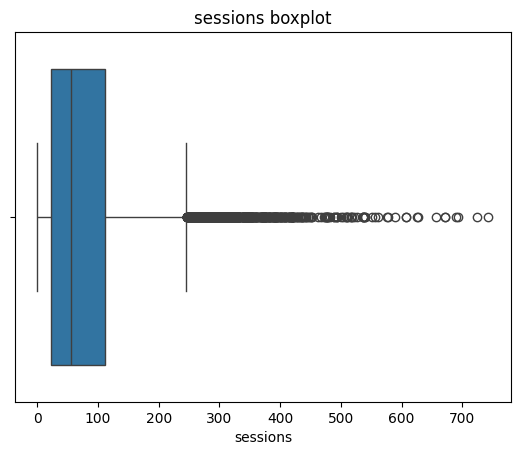

In [24]:
sns.boxplot(data = df, x = df['sessions'])
plt.title('sessions boxplot')
plt.show()

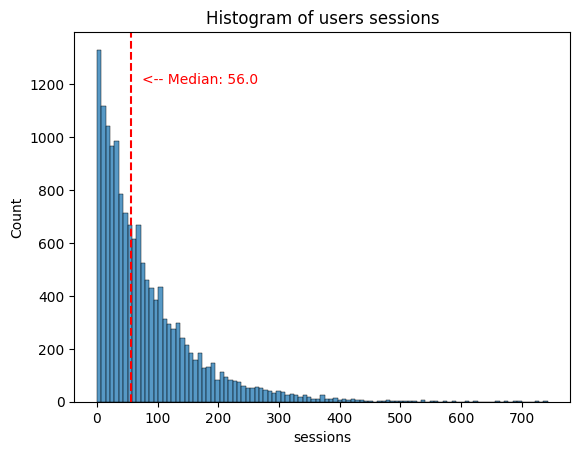

In [25]:
sns.histplot(data = df, x = df['sessions'])
plt.title('Histogram of users sessions')
median = df['sessions'].median()
plt.axvline(median, color = 'red', linestyle = '--')
plt.text(75 , 1200, '<-- Median: {}'.format(median), color = 'red')
plt.show()

* From observing the boxplot there seems to be several outliers where some have over 700+ sessions!
* From observing the histogram, the graph is a right-skewed distribution with half the distribution having 56 or fewer sessions. 

### drives <font size = "1"> (An occurence of driving at least 1km during the month) </font>

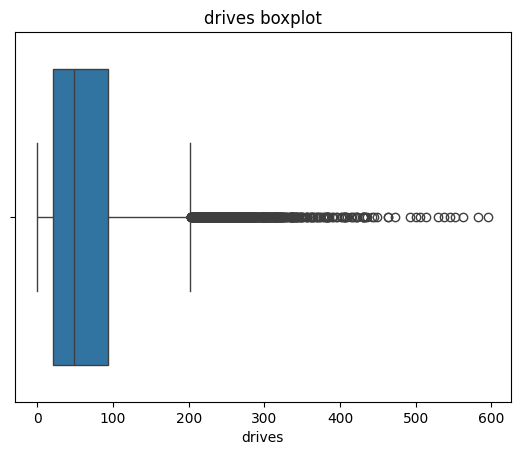

In [26]:
sns.boxplot(data = df, x = df['drives'])
plt.title('drives boxplot')
plt.show()

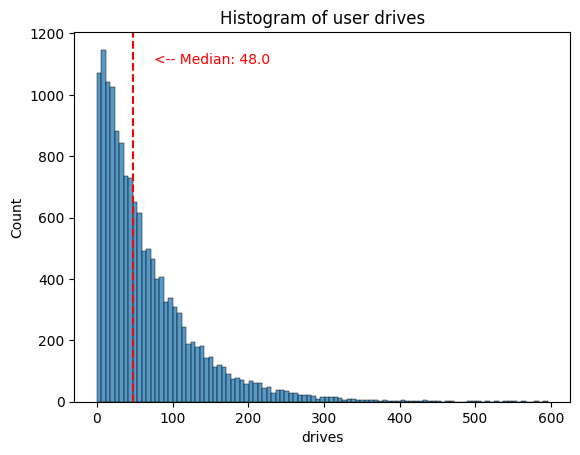

In [27]:
sns.histplot(data = df, x = df['drives'])
median = df['drives'].median()
plt.axvline(median, color = 'red', linestyle = '--')
plt.text(75, 1100, '<-- Median: {}'.format(median), color = 'red')
plt.title('Histogram of user drives') 
plt.show()

* Based off the boxplot, there are several outliers. In this case there are some instances of 500+ drives. This implies that some users have had over 500+ occurrences of driving at least 1km during the month. 
* From observing the histogram, the graph has a right-skewed distribution where half of the data is around 48 drives. 


We are going to create 2 functions that will generate boxplots and histograms for us so that we can determine outliers and the distribution spread.

In [28]:
def boxplotmaker (variable):
    """ 
    This function is design to generate a boxplot for the intended variable that wants to be analyzed. These boxplots will be used to determine any outliers within these variables that 
    we can insepct. 

    Parameters:
            variable(str): the variable of interest in the waze dataset.
    """

    sns.boxplot(data = df, x = df[variable])
    plt.title('{} boxplot'.format(variable). replace('_', ' ').capitalize())
    plt.show()  

In [29]:
def histmaker (variable):
    """
    This function will generate a histogram of the variable of interest. The histogram will help determine the distribution of the variable that is being analyzed 

    Parameters:
            variable(str): The variable of interest in the waze dataset.
    """

    sns.histplot(data = df, x=df[variable])
    median = df[variable].median()
    plt.axvline(median, color = 'red', linestyle = '--')
    plt.title('{} histogram'.format(variable).replace('_', ' ').capitalize())
    plt.text(median, 500, '  <== Median: {}'.format(median), color = 'red')
    plt.show()

### total_sessions <font size = "1"> (A model estimate of total number of sessions since user has onboarded) </font>

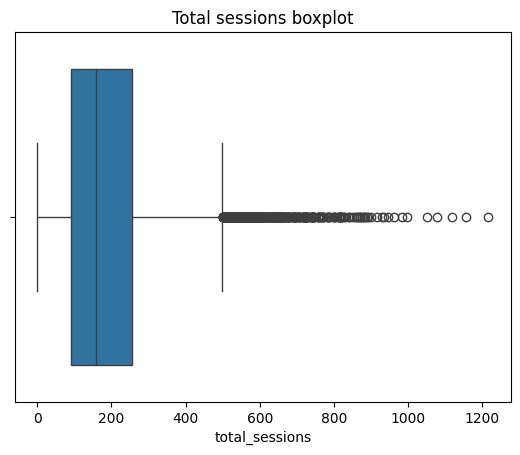

In [30]:
boxplotmaker('total_sessions')

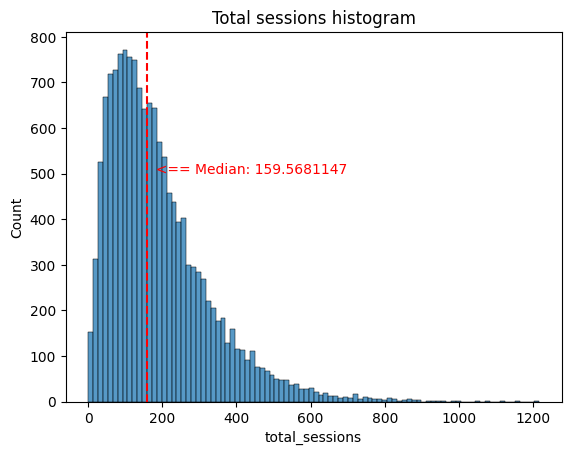

In [31]:
histmaker('total_sessions')

* Similarly with the other boxplots, there seems to be outliers with this variable as well. 
* The histogram shows a right-skewed distribution with a median of 159.  Note that the `sessions` median was around 56 which shows that nearly `35%` of the of user’s median sessions occurred within the last month (56/156 = 0.35). This is something the Waze team can look into further. 


### n_days_after_on_boarding <font size = "1"> (Number of days since the user signed up for the app) </font>

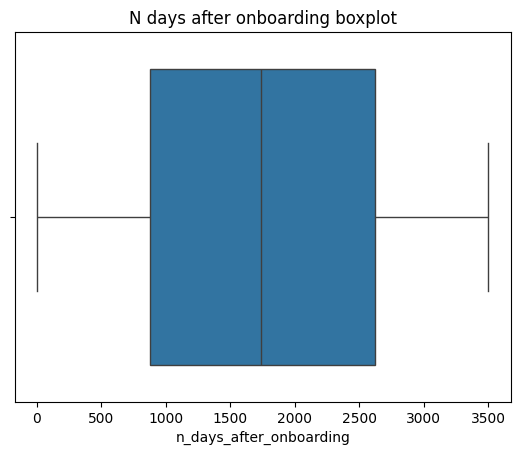

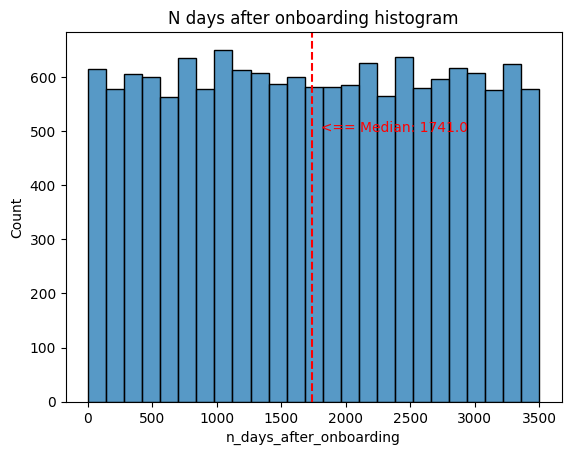

In [32]:
boxplotmaker('n_days_after_onboarding')
histmaker('n_days_after_onboarding')

* The boxplot shows no outliers for this variable and the histogram actually shows a uniform distribution. The median is 1741 days which is roughly 5 years. We noted earlier that users had have 35% of their median sessions within this past month even though the median onboarding time is roughly 5 years. This is also something further we can investigate as well. 

### driven_km_drives <font size = "1"> (total km driven during the month) </font>

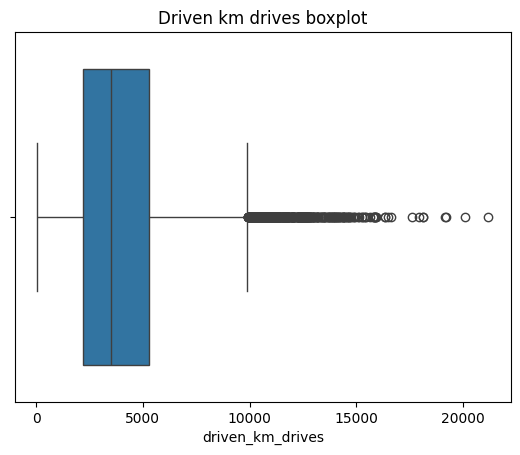

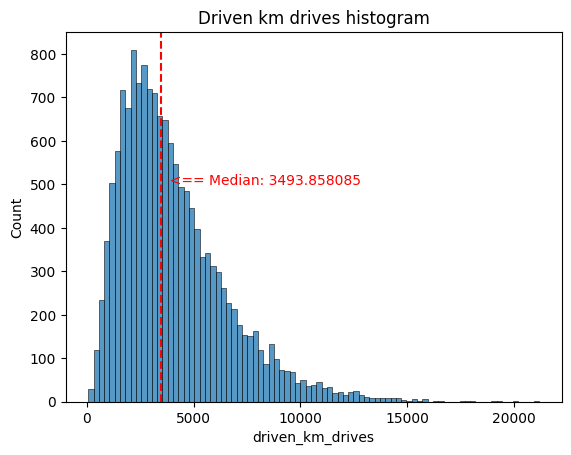

In [33]:
boxplotmaker('driven_km_drives')
histmaker('driven_km_drives')

* The boxplot shows outliers where some drivers are driving over 20000km a month!
* The histogram shows a right-skewed distribution and the median is 3493km a month. This is around 116km a day if a user were to drive everyday which is a lot compared to the regular person. Maybe Waze can look more into the dataset and figure out who exactly are these users are (truck drivers?)


### duration_minutes_drives <font size = "1"> (Total duration driven in minutes during the month) </font>

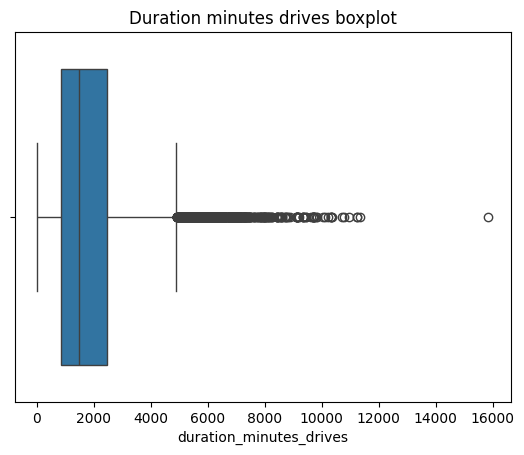

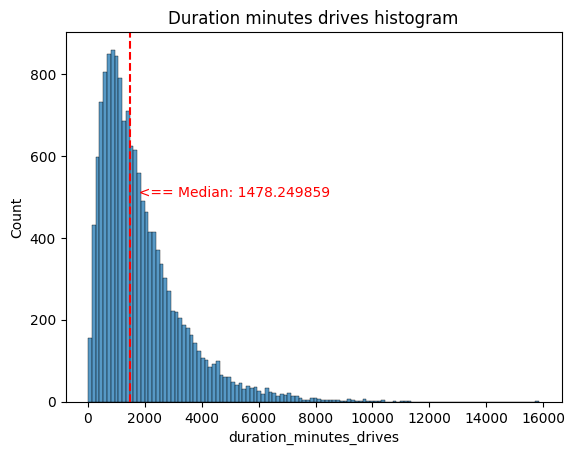

In [34]:
boxplotmaker('duration_minutes_drives')
histmaker('duration_minutes_drives')

* Boxplot showing outliers as well.
* Histogram is right-skewed distribution where the median is 1478. This is roughly 24.6 hrs (1 entire day) of driving. There are some instances of users driving over 200 hours which equate to 8 days of total time spent driving! There seems to be an on going pattern indicating that these drivers aren't your typical drivers. 

### activity_days <font size = "1"> (Number of days user opens the app during the month) </font>

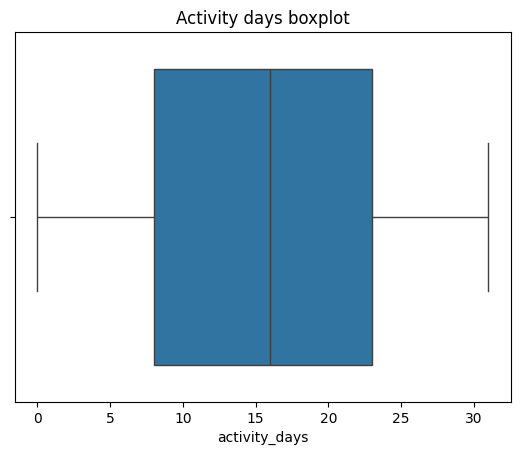

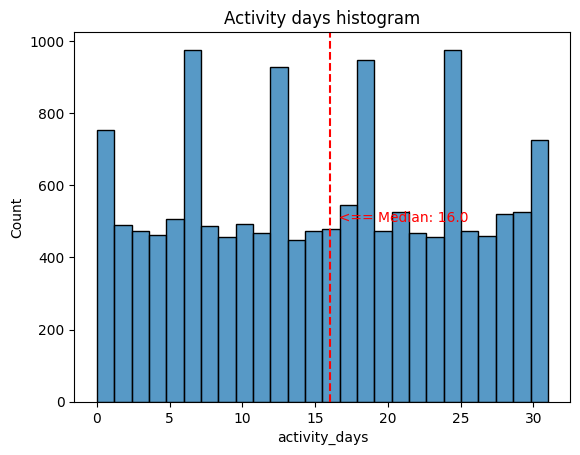

In [35]:
boxplotmaker('activity_days')
histmaker('activity_days')

* The boxplot indicates no outliers and the histogram shows a uniform distribution where the median is around 16. The `sessions` distribution and `activity_days` distribution don’t mirror each other. This is something we can look into because you'd expect them to have similar distributions. 

### driving_days <font size = "1"> (Number of days user drives (at least 1km) during the month) </font>

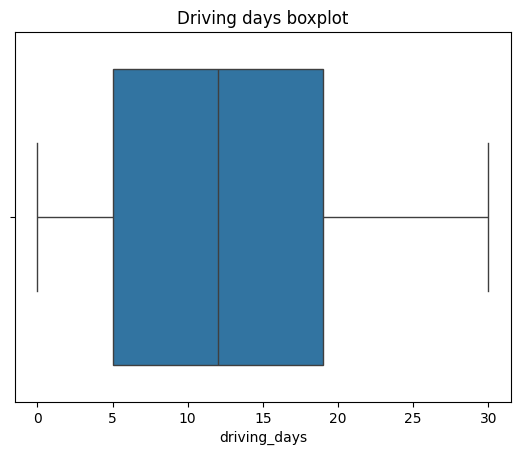

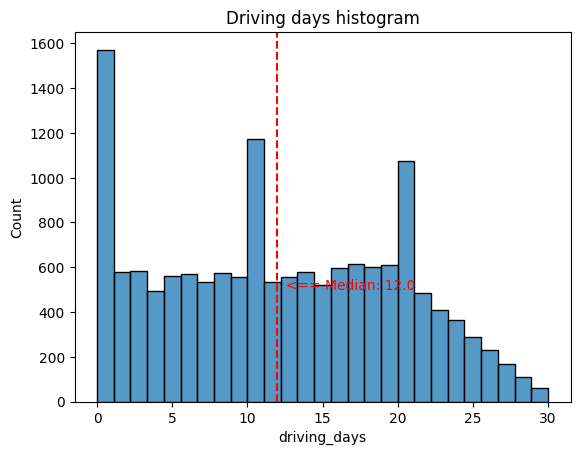

In [36]:
boxplotmaker('driving_days')
histmaker('driving_days')

* Nearly twice as many users (~1000 vs ~500) who did not drive at all compared to not opening the app. 

Since `device` and `label` are categorical variables, we will use pie charts to show their distributions.

### device <font size = "1"> (Type of device user starts a session with) </font>


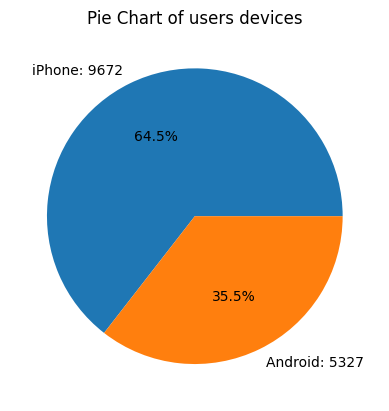

In [37]:
data = df['device'].value_counts()
plt.pie(data, labels=[f'{data.index[0]}: {data.values[0]}',
                      f'{data.index[1]}: {data.values[1]}'],
                      autopct= '%1.1f%%' 
                      )
plt.title('Pie Chart of users devices')
plt.show()

* We noted before that there are roughly `64.5%` of iPhone users and there are around `35.5%` of `Android` users. Also, there are nearly double `iPhone` users than `Android` users.

### label <font size = "1"> (If a user churned anytime durign the course of the month) </font>

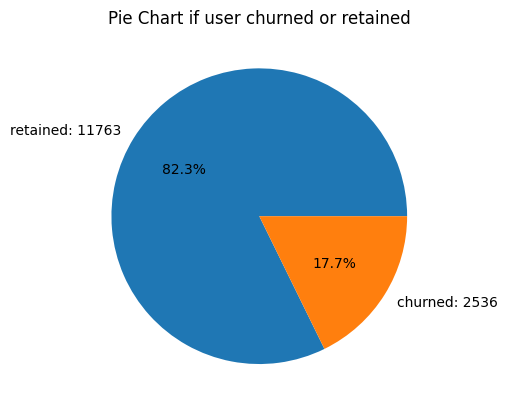

In [38]:
data = df['label'].value_counts()
plt.pie(data, labels=[f'{data.index[0]}: {data.values[0]}',
                      f'{data.index[1]}: {data.values[1]}'],
                      autopct= '%1.1f%%' 
                      )
plt.title('Pie Chart if user churned or retained')
plt.show()

* Only `18%` of users `churned`

### **Data Visualization Pt.2**

In this section we are going to generate some graphs to get a better understanding of the relationships between these variables. From here we can infer whether or not any variables will affect whether or not a user will `churn` or not.

To begin we are going to plot the `driving days vs activity days` to see if we can notice any patterns 

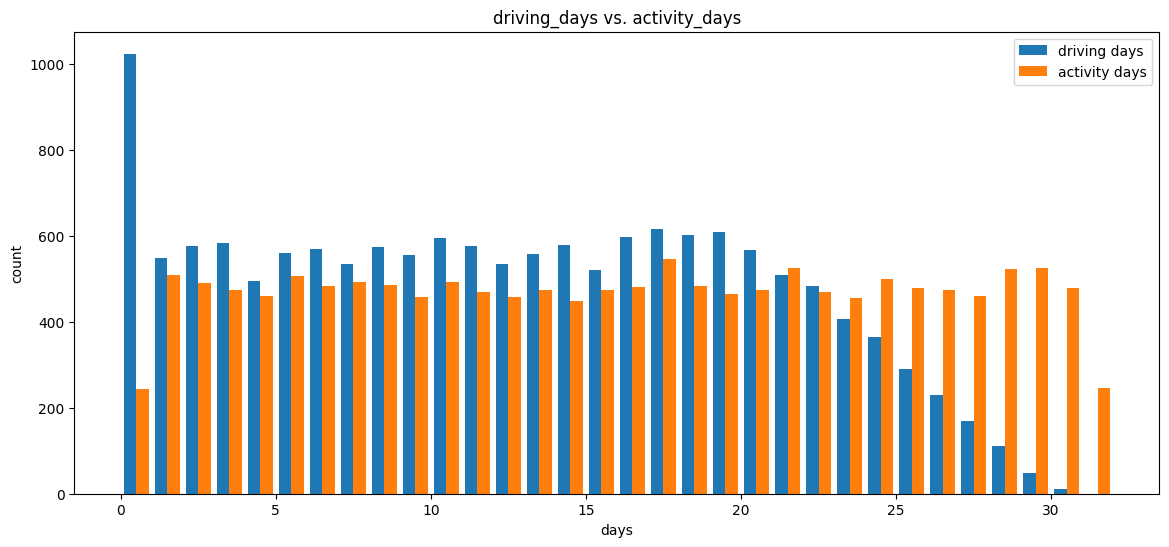

In [39]:
plt.figure(figsize=(14,6))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
bins=range(0,33),
label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

* We can see that there are fewer people who don’t use the app at all than those who don’t drive at all (when days = 0)
    * This is possible because user may just open the app by accident (this will count as an activity day). Hence why there are so much activity days for days = 30 but barely any driving days because users may just open the app everyday to check driving times but never use the app to navigate to the location.

In [40]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


Note that the max number of `driving days` is `30` (implying no user ever drove every single day on a 31-day month), whereas the max number for `activity days` is `31` implying a user used the app everyday in a 31-day month.

We can use a scatterplot to showcase the theoretical limit of `driving days` and `activity days`. 


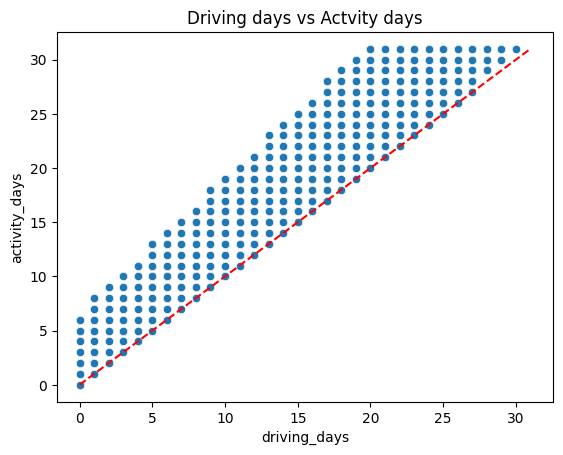

In [41]:
sns.scatterplot(data = df, x  = 'driving_days', y = 'activity_days')
plt.title('Driving days vs Actvity days')
plt.plot([0,31],[0,31], color = 'red', linestyle = '--')
plt.show()

If you open the app it counts as an `activity day` therefore you can never have more `driving days` than `activity days`. 

We can now plot a histogram showing the retention by device.

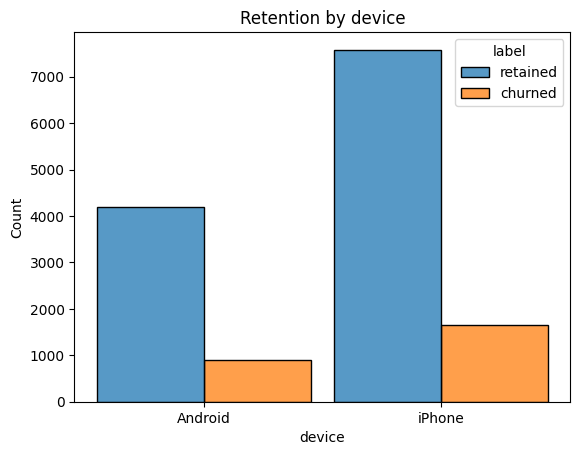

device   label   
Android  retained    0.824399
         churned     0.175601
iPhone   retained    0.821680
         churned     0.178320
Name: proportion, dtype: float64


In [42]:
sns.histplot(data = df, 
             x='device',
             hue = 'label',
             multiple= 'dodge',
             shrink = 0.9
             )
plt.title('Retention by device')
plt.show()
print(df.groupby('device')['label'].value_counts(normalize=True))

This graph is just a visual representation from our numeric analysis from before which showed that no matter the device type, the user churn for both devices is around `17.6%`.

We will now inspect the retention by kilometers per driving day. This will show us how many users `churn` depending how much kms they drive in a day throughout the month. In order to do this, we'll construct a new variable `km_per_driving_day`.

In [43]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

c:\Users\Saran\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that the mean is `inf` and the std is `NaN`, this is because `driving_days` have 0 values and if you divide by `0` it will give these outputs. In order to fix this, we will convert these inf values to 0.

In [44]:
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

Note the max number of kms is 15420kms in a single day which is impossible to accomplish. The mean is 578km which is way too much for a regular driver per day. We will set a max limit of 1200km as we will say a user drove for 12 hours at 100km an hour.  

We will now generate a histogram graph which will show case the difference of `churn rate` for the km driven per day.

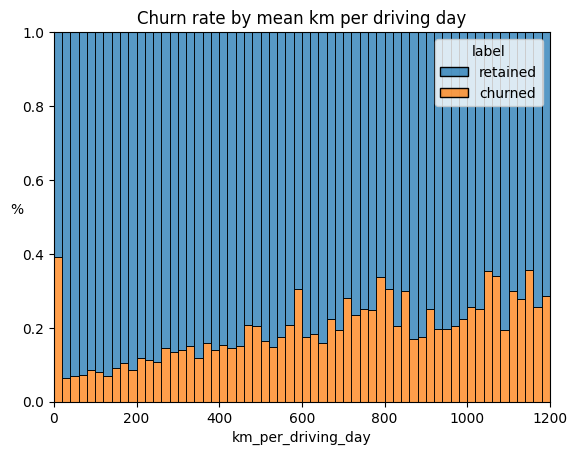

In [45]:
sns.histplot(data = df,
             x = 'km_per_driving_day',
             hue='label',
             bins = range(0,1201, 20),
             multiple = 'fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean km per driving day')
plt.show()

The more `km_per_driving_day` the higher the `churn` rate for users. This might be due to the fact that users who `churn` might have just driven a lot in 1 `driving_day` which causes their `km_per_driving_day` to be high.

Let's examine the `churn rate` for the number of driving days for users.

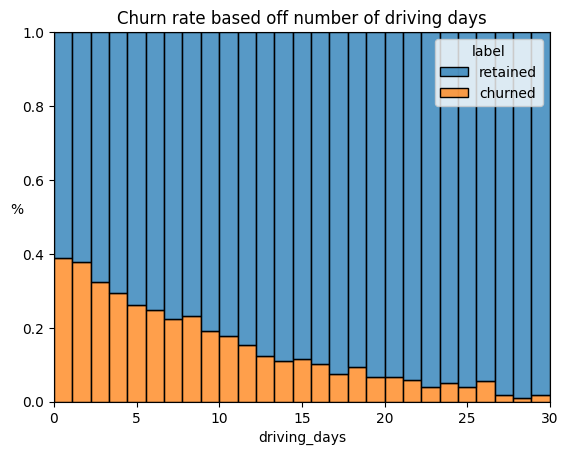

In [46]:
sns.histplot(data = df, 
             x = 'driving_days',
             hue = 'label', 
             multiple = 'fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate based off number of driving days')
plt.show()

As we can see, the `churn rate` decreases as the number of `driving days` increase. This means that users who use the app more often tend to churn less. We can imply that those who use the app less are the ones who had a high `km_per_driving_day`. 

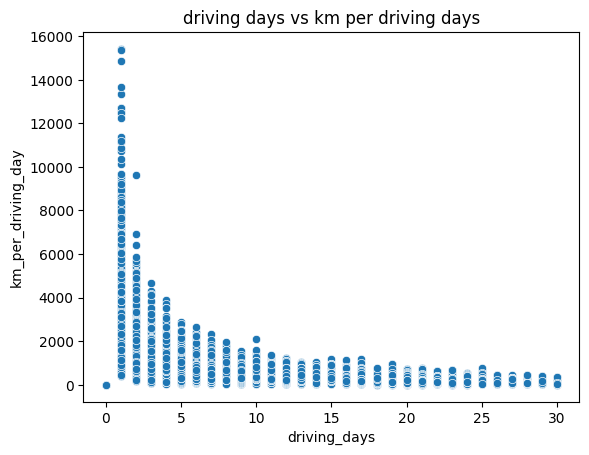

In [47]:
sns.scatterplot(data = df,
                x = 'driving_days',
                y = 'km_per_driving_day')
plt.title('driving days vs km per driving days')
plt.show()

As we can see, there are several of users who drove extreme distances under 1 `driving day`. Maybe they were travelling by plane or another transportation device because these values seem insane. However, as the `driving_days` increases we can see that the `km_per_driving_day` tend to range between a reasonable number. 

Let's now examine the proportion of sessions that occurred within the last month.

In [48]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Note that `42%` of user’s median sessions occurred within the last month. 

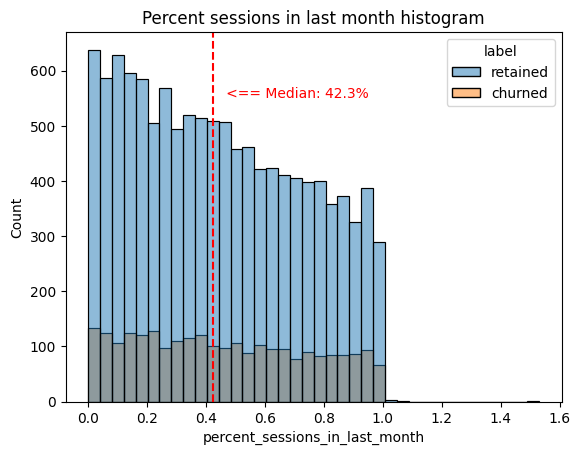

In [49]:
sns.histplot(data = df, x = 'percent_sessions_in_last_month', 
             hue ='label',
             multiple = 'layer')
median = df['percent_sessions_in_last_month'].median()
plt.axvline(median, color = 'red', linestyle = '--')
median = round(median, 3)
plt.text(median, 550, '   <== Median: {}%'.format(median*100), color ='red')
plt.title('Percent sessions in last month histogram')
plt.show()

In [50]:
df['n_days_after_onboarding'].median()

1741.0

From this graph we can see that the median is `42.3%`. By looking at the graph, nearly half the users had `40%` or more of their sessions within the last month. Why is this though? The median number of days of a user onboarding is 1741 days which is nearly 5 years. This is odd because over half the users `sessions` have been during this past month whereas the median of users having a Waze account is nearly 5 years. This is something we can ask the Waze HR team as there may have been promotion or update to the Waze app that had the user's use the app more this past month.

### **Dealing with outliers**

From the boxplots that were produced earlier we determined that there were several outliers within the variables. Therefore, we shall construct a function that takes the 95th percentile of a variable and reassign the values above 95th percentile for each variable to this threshold value. The variables that we will use this function are: 
* `sessions`
* `drives` 
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [51]:
def outlier_imputer(column_name, percentile):
    ''' 
    This function will calculate the (percentile)th of the column that is inputted. Then those values 
    that are greater than the (percentile)th value will be reassigned to this new value. 

    Parameters:
            column_name(str): The name of the column the user is interested to change the values for
            percentile(int): the percentile that the user desires to calculate 
    '''

    threshold = df[column_name].quantile(percentile)
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>30} | percentile: {} | threshold: {}'.format(column_name,percentile, round(threshold,2)))

In [52]:
for column in ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives']:
    outlier_imputer(column, 0.95)

                      sessions | percentile: 0.95 | threshold: 243.0
                        drives | percentile: 0.95 | threshold: 201.0
                total_sessions | percentile: 0.95 | threshold: 454.36
              driven_km_drives | percentile: 0.95 | threshold: 8889.79
       duration_minutes_drives | percentile: 0.95 | threshold: 4668.9


Let's create a boxplot of the `sessions` variable to see if this works.

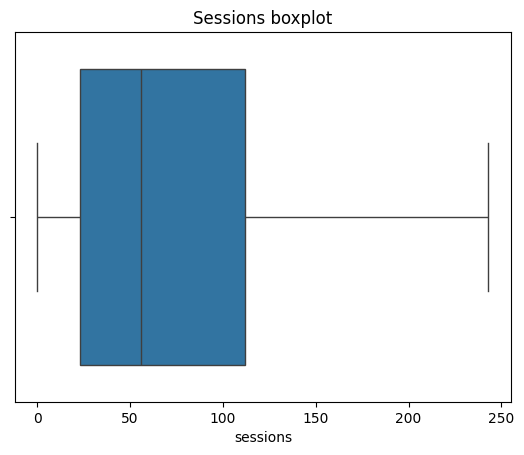

In [55]:
boxplotmaker('sessions')

As you can see there seems to be no outliers shown on this graph. Therefore, we can use this data set to conduct a binomial logistic regression if needed.

## **Final Thoughts**

Throughout this EDA, we were able use multiple statistical tools to infer and construct conclusions on the dataset itself. We were able to detect any missing data and as well as create new variables within the dataset to get a better understanding of the data. When studying the variables distributions, we were able to conclude that most variables either had a right-skewed distribution or a uniform distribution. We figured out that the reason why there were so many right-skewed variables was because a lot of Waze user's values of these variables were on the lower end. However, the dataset also contained the few users who drove extreme distances which resulted in the variable to become rightly-skewed. 

Since we were examining user churn, we discovered that the further a user drove per driving day, the more likely they were to churn. This is most likely due to the fact that users that had high kms per driving days were typically users who may have drove an extreme distance for one driving day and never had any other "driving days" afterwards within that month. This was further proven by another graph that was generated which showed a negative correlation of users churning based on the driving days. Overall, the dataset did show that less than 18% of users actually churned while 82% retained. 

Another thing we noticed when we constructed the EDA was that long time users of the app had nearly more than 40% of their total sessions within the last month. We discovered that the median number of days of users onboarding is 1740 which is nearly 5 years. This implies that even though users had their accounts for 5 years, they've had 40% of their total sessions within the last month! We are unsure why this is and this may be due to the fact the Waze may have had a promotion or a massive update that changed the app completely. 

In conclusion, this dataset was unique in regards to the median values of some of these variables. In my opinion some values were extremely high for it to be a median value, implying that this dataset contains atypical drivers. This was shown predominately with the driven km variable which had a median of 3493kms per month. This is nearly 116km a day which is a lot of driving everyday for a month. It would be nice to get further information on these users such as their occupation or where they reside as most of these users may have an occupation that correlates to driving or live in areas that are more isolated. 